In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt
# Dataset exploring
import os

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
#!pip install --upgrade tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [3]:
TRAIN_PATH = '/content/extracted/dataset/dataset/train'
TEST_PATH = '/content/extracted/dataset/dataset/test'
SIZE = (240, 240)

In [ ]:
# from tensorflow.keras.preprocessing import image_dataset_from_directory
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, AveragePooling2D
# from tensorflow.keras.models import Model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile
import os

# ZIP 파일 경로 (Google Drive 내 경로로 변경)
zip_path = '/content/drive/MyDrive/archive.zip'

# 압축 해제 대상 디렉토리 (Colab 환경)
extract_to = '/content/extracted/'

# 디렉토리가 없으면 생성
os.makedirs(extract_to, exist_ok=True)

# ZIP 파일 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")


Files extracted to /content/extracted/


In [55]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['freshoranges', 'rottenbanana', 'rottenapples', 'rottenoranges', 'freshapples', 'freshbanana']


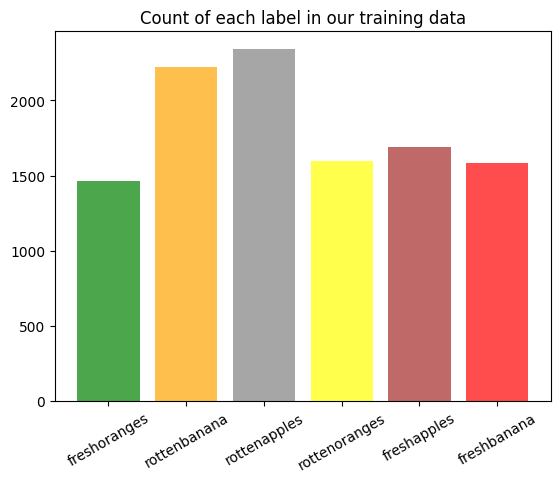

['freshoranges', 'rottenbanana', 'rottenapples', 'rottenoranges', 'freshapples', 'freshbanana']


In [7]:
import os
import matplotlib.pyplot as plt

TRAIN_PATH = '/content/extracted/dataset/dataset/train'  # update if necessary

# Collect labels and counts based on the directory structure
labels = []
counts = []

# Loop over each class directory in the TRAIN_PATH
for class_ in os.listdir(TRAIN_PATH):
    class_path = os.path.join(TRAIN_PATH, class_)

    if os.path.isdir(class_path):  # Check if it's a directory
        labels.append(class_)
        num_images = len([f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')])  # Count .jpg or .png files
        counts.append(num_images)

# Plot the count of images per label
plt.figure()
plt.bar(range(len(counts)), counts, color = ['green', 'orange', 'grey', 'yellow', 'brown', 'red'], alpha = .7)
plt.xticks(range(len(counts)), labels, rotation=30)
plt.title('Count of each label in our training data')
plt.show()

print(labels)  # Print the labels for reference


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255)


train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE,
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


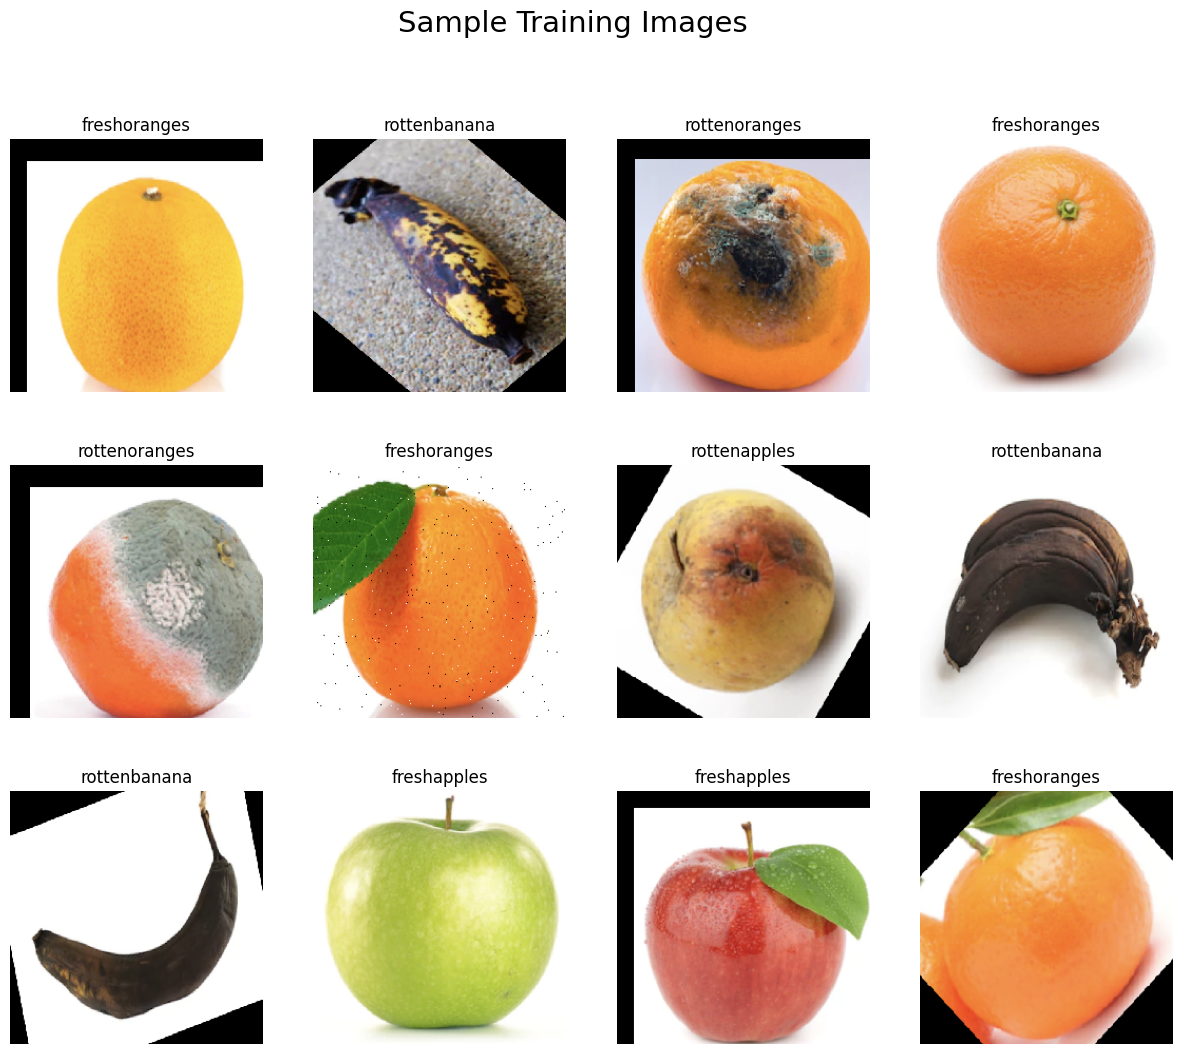

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 238, 238, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 119, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 119, 119, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 117, 117, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 58, 58, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,947,078 (49.39 MB)

 Trainable params: 12,947,078 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 배치 크기
batch_size = 32

# steps_per_epoch와 validation_steps 설정
steps_per_epoch = len(train_dataset) // batch_size
validation_steps = len(val_dataset) // batch_size

# 모델 훈련
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=120,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# 모델 저장 경로 설정
model_save_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'

# 모델 저장
model.save(model_save_path)

print(f"모델이 성공적으로 저장되었습니다: {model_save_path}")


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 508ms/step - accuracy: 0.1397 - loss: 3.7000 - val_accuracy: 0.2500 - val_loss: 1.7846
Epoch 2/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.2552 - loss: 1.7773 - val_accuracy: 0.0938 - val_loss: 1.7874
Epoch 3/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.2195 - loss: 1.7602 - val_accuracy: 0.3750 - val_loss: 1.7297
Epoch 4/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.3191 - loss: 1.7402 - val_accuracy: 0.5312 - val_loss: 1.6489
Epoch 5/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.3747 - loss: 1.6317 - val_accuracy: 0.4375 - val_loss: 1.4929
Epoch 6/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.4087 - loss: 1.3944 - val_accuracy: 0.5938 - val_loss: 1.2654
Epoch 7/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.5763 - loss: 1.2025 - val_accuracy: 0.5312 - val_loss: 1.2525
Epoch 8/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 788ms/step - accuracy: 0.5120 - loss: 1.2402 - val_accuracy: 0.5625 - val_loss: 1.

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.8615 - loss: 0.3447 - val_accuracy: 0.9062 - val_loss: 0.3612
Epoch 37/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.8796 - loss: 0.4576 - val_accuracy: 0.8750 - val_loss: 0.4182
Epoch 38/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.8683 - loss: 0.3478 - val_accuracy: 0.9062 - val_loss: 0.3649
Epoch 39/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.8442 - loss: 0.3714 - val_accuracy: 0.8125 - val_loss: 0.5529
Epoch 40/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 219ms/step - accuracy: 0.8602 - loss: 0.4562 - val_accuracy: 0.8750 - val_loss: 0.3513
Epoch 41/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.9200 - loss: 0.3028 - val_accuracy: 0.7812 - val_loss: 0.5107
Epoch 42/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 0.8998 - loss: 0.2310 - val_accuracy: 0.9062 - val_loss: 0.2274
Epoch 43/120
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.9012 - loss: 0.2456 - val_accuracy: 0.9375 - val_lo

모델이 성공적으로 저장되었습니다: /content/drive/MyDrive/saved_model/fruit_classifier3.h5


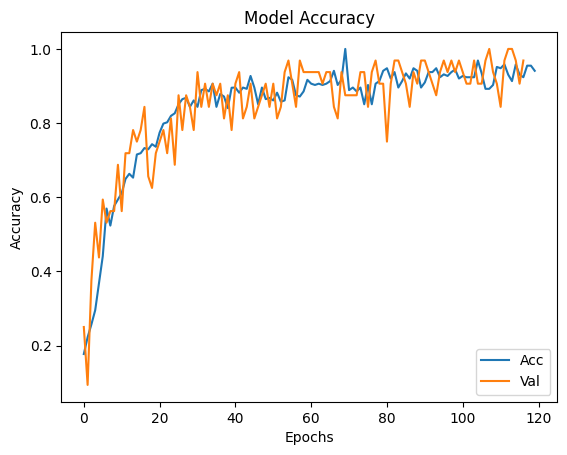

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

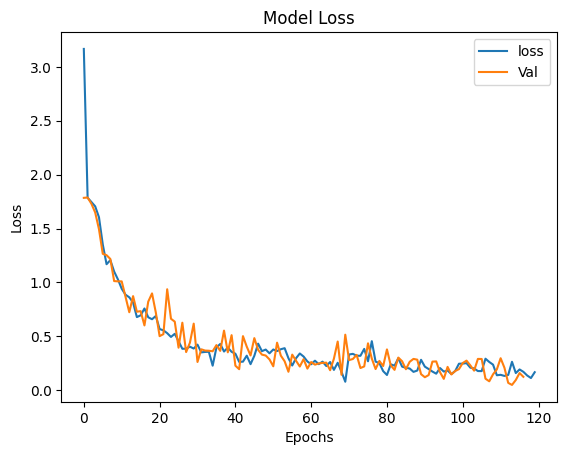

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

Found 2698 images belonging to 6 classes.
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9371 - loss: 0.1966
Accuracy on test set: 0.929948091506958
Loss on test set: 0.19552257657051086
2698/2698 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step

Classification Report:
                precision    recall  f1-score   support

 freshoranges       0.96      0.93      0.94       388
 rottenbanana       0.93      0.99      0.96       530
 rottenapples       0.94      0.84      0.89       601
rottenoranges       0.83      0.93      0.88       403
  freshapples       0.94      0.94      0.94       395
  freshbanana       0.99      0.98      0.99       381

     accuracy                           0.93      2698
    macro avg       0.93      0.93      0.93      2698
 weighted avg       0.93      0.93      0.93      2698



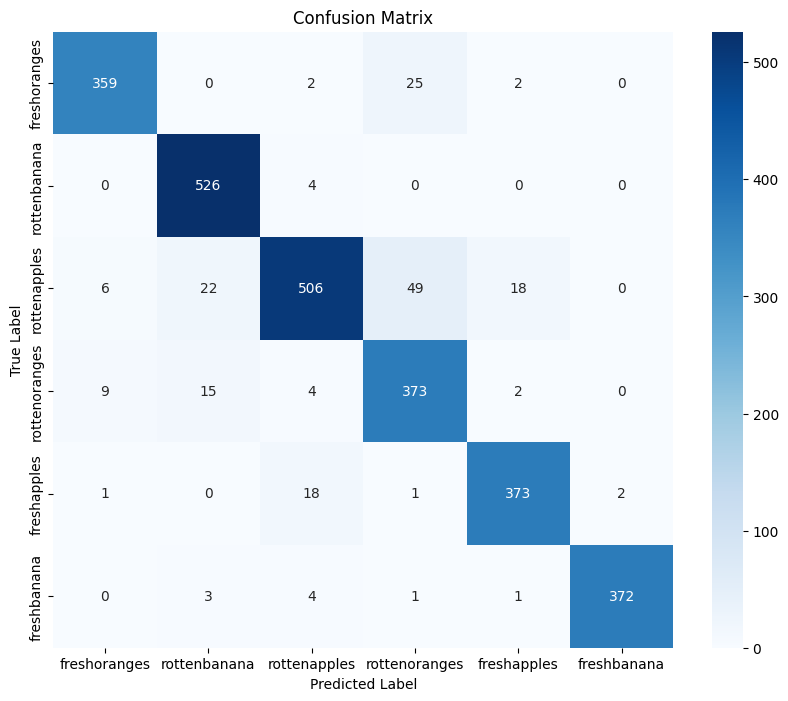

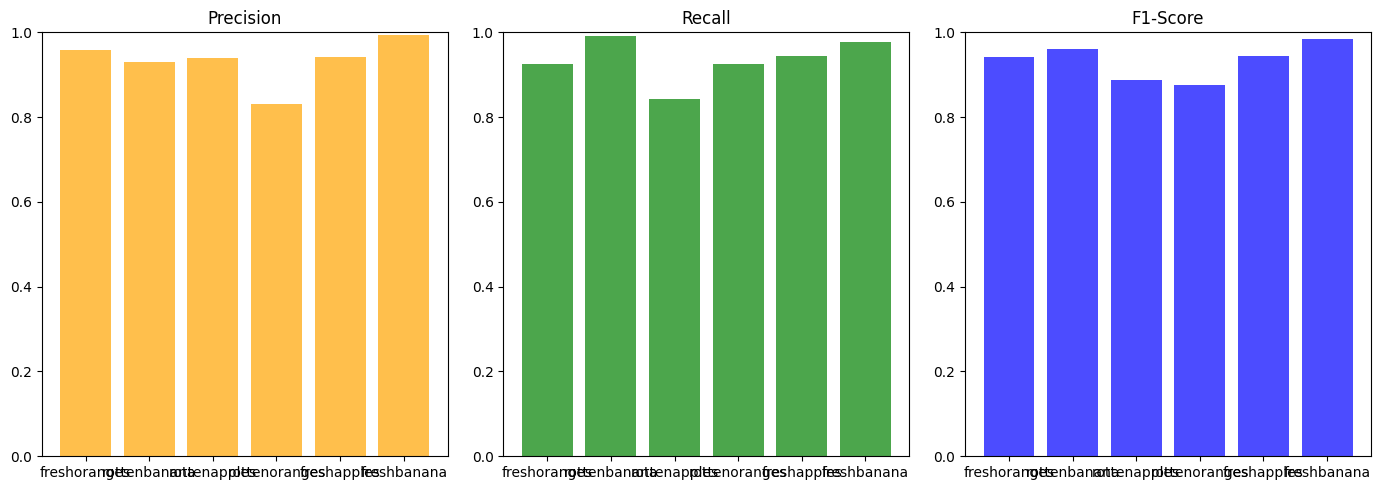

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
import os
import tensorflow as tf

# 경고 필터링
warnings.filterwarnings("ignore", category=UserWarning)  # 특정 경고만 무시

# TensorFlow 로깅 설정
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2: 경고 무시
tf.get_logger().setLevel('ERROR')         # TensorFlow의 내부 로깅을 ERROR로 제한


# Test set data preparation
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator for test set
test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    batch_size=1,  # Process one image at a time for evaluation
    target_size=SIZE,  # Target size (defined by the user)
    shuffle=False,  # Ensure the order matches for comparison
    classes=labels,  # Map class labels explicitly
    class_mode='categorical'
)

# Get filenames and true labels
filenames = test_generator.filenames
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())  # Retrieve class names

# Evaluate model on the test set
nb_samples = len(filenames)
loss, acc = model.evaluate(test_generator, steps=nb_samples, verbose=1)
print('Accuracy on test set:', acc)
print('Loss on test set:', loss)

# Generate predictions
predictions = model.predict(test_generator, steps=nb_samples, verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:\n", classification_rep)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate precision, recall, and F1-score
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Handle potential NaN values in F1-score due to division by zero
precision = np.nan_to_num(precision, nan=0.0)
recall = np.nan_to_num(recall, nan=0.0)
f1_score = np.nan_to_num(f1_score, nan=0.0)

# Bar plots for metrics
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.bar(class_names, precision, color='orange', alpha=0.7)
plt.title('Precision')
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.bar(class_names, recall, color='green', alpha=0.7)
plt.title('Recall')
plt.ylim(0, 1)

plt.subplot(1, 3, 3)
plt.bar(class_names, f1_score, color='blue', alpha=0.7)
plt.title('F1-Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


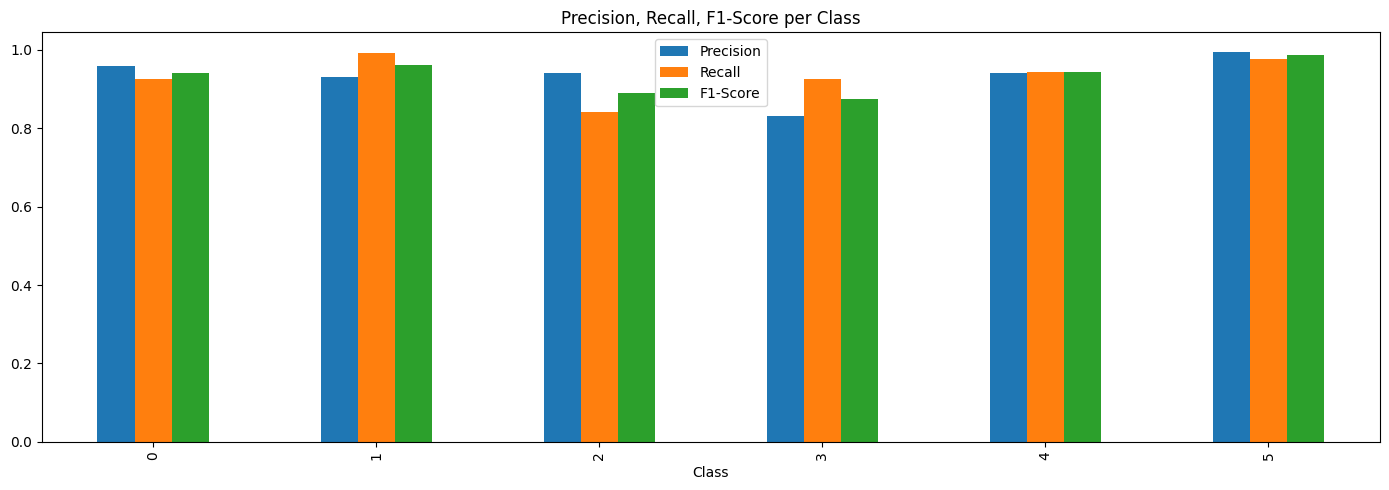

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)
# Get precision, recall, and F1-Score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels_encoded, predicted_labels_encoded, average=None)


# 가정: precision, recall, f1_score는 이미 정의되어 있는 변수들입니다.

# Create a DataFrame for metrics
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': f1_score})
metrics_df.index.name = 'Class'

# Create a bar plot
fig, ax = plt.subplots(figsize=(14, 5))

# Plot the bar chart
metrics_df.plot(kind='bar', ax=ax)

# Set the title
ax.set_title('Precision, Recall, F1-Score per Class')

# Display the plot with tight layout
plt.tight_layout()
plt.show()


In [41]:
# Get filenames from test generator
files = test_generator.filenames

# Get class indices (class name to index mapping)
class_dict = test_generator.class_indices

# Reverse the mapping (index to class name)
rev_dict = {value: key for key, value in class_dict.items()}

# Map predictions to class names and probabilities
for i, p in enumerate(predictions):
    index = np.argmax(p)  # Predicted class index
    klass = rev_dict[index]  # Class name
    prob = p[index]  # Probability
    # Optionally print prediction details
    # print(f'File: {files[i]}, Predicted Class: {klass}, Probability: {prob:.2f}')


In [42]:
# Inspect the shape of a batch
print(f"Shape of test batch data: {test_generator[0][0].shape}")  # Image batch
print(f"Shape of test batch labels: {test_generator[0][1].shape}")  # Label batch


Shape of test batch data: (1, 240, 240, 3)
Shape of test batch labels: (1, 6)


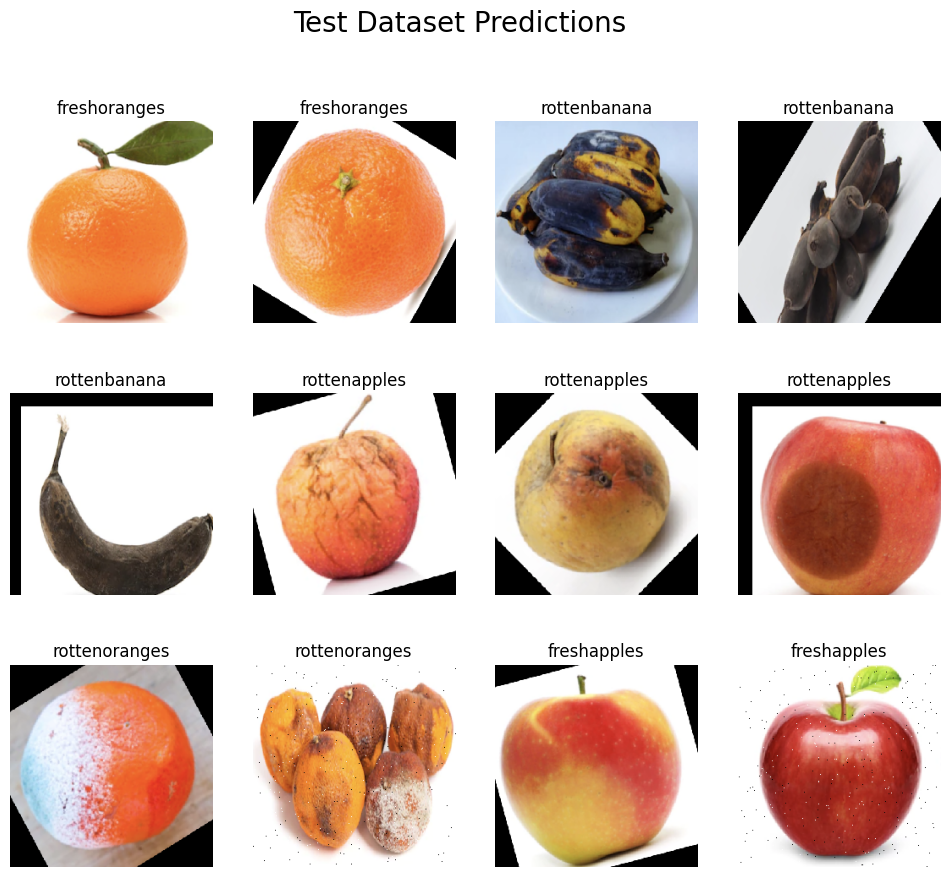

In [43]:
# Plot predictions in a grid
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))

# Set the starting index for displaying images
idx = 0

for i in range(3):
    for j in range(4):
        # Get image and prediction
        image = test_generator[idx][0].reshape(SIZE[0], SIZE[1], 3)  # Resize to (240, 240, 3)
        predicted_label = rev_dict[np.argmax(predictions[idx])]  # Predicted class name

        # Display image with predicted label
        ax[i, j].imshow(image)
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].axis("off")

        idx += 200  # Increment index to sample different images

# Add a main title and display the plot
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
True Label: rottenbanana
Predicted Class: rottenbanana, Confidence: 99.97%


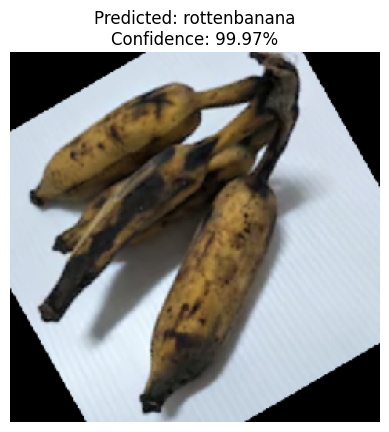

In [99]:
import random
import matplotlib.pyplot as plt
import numpy as np

# 랜덤한 인덱스를 선택하여 이미지를 하나씩 처리
def random_image_prediction(test_generator, model, rev_dict, size=(240, 240)):
    # 전체 이미지 목록에서 랜덤한 인덱스를 선택
    idx = random.randint(0, len(test_generator.filenames) - 1)

    # 이미지 하나씩 가져오기
    test_generator.reset()  # 이미지를 처음부터 다시 읽기 위해 리셋
    for i in range(idx):  # idx까지 순차적으로 이미지를 가져오기
        next(test_generator)

    # 선택된 이미지 불러오기
    batch = next(test_generator)  # 배치 하나 가져오기
    image = batch[0][0].reshape(size[0], size[1], 3)  # (240, 240, 3)으로 크기 맞추기
    true_label = rev_dict[np.argmax(batch[1][0])]  # 실제 라벨
    predicted_probs = model.predict(np.expand_dims(batch[0][0], axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"True Label: {true_label}")
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (한 번 호출해서 테스트)
random_image_prediction(test_generator, model, rev_dict, size=(240, 240))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted Class: freshapples, Confidence: 92.32%


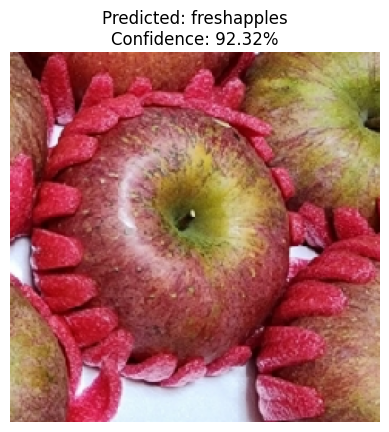

In [108]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'
model = tf.keras.models.load_model(model_path)

# 경로에서 이미지 하나를 선택하여 예측하는 함수
def custom_image_prediction(image_path, model, rev_dict, size=(240, 240)):
    # 이미지 불러오기
    img = image.load_img(image_path, target_size=size)  # 크기에 맞게 이미지 로드
    img_array = image.img_to_array(img) / 255.0  # 이미지를 numpy array로 변환 후 정규화

    # 예측
    predicted_probs = model.predict(np.expand_dims(img_array, axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (이미지 경로를 지정)
image_path = "/content/drive/MyDrive/fresh_apple5.png"  # 사용자가 이미지 경로를 직접 지정
custom_image_prediction(image_path, model, rev_dict, size=(240, 240))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
Predicted Class: freshapples, Confidence: 95.39%


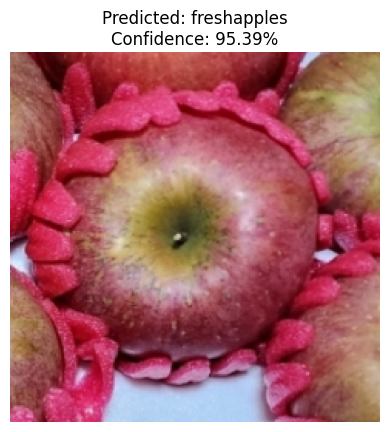

In [124]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'
model = tf.keras.models.load_model(model_path)

# 경로에서 이미지 하나를 선택하여 예측하는 함수
def custom_image_prediction(image_path, model, rev_dict, size=(240, 240)):
    # 이미지 불러오기
    img = image.load_img(image_path, target_size=size)  # 크기에 맞게 이미지 로드
    img_array = image.img_to_array(img) / 255.0  # 이미지를 numpy array로 변환 후 정규화

    # 예측
    predicted_probs = model.predict(np.expand_dims(img_array, axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (이미지 경로를 지정)
image_path = "/content/drive/MyDrive/fresh_apple8.png"  # 사용자가 이미지 경로를 직접 지정
custom_image_prediction(image_path, model, rev_dict, size=(240, 240))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Predicted Class: freshapples, Confidence: 69.19%


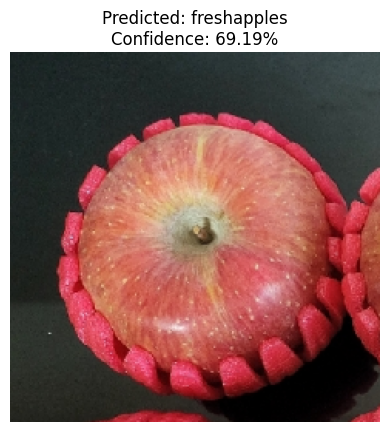

In [125]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'
model = tf.keras.models.load_model(model_path)

# 경로에서 이미지 하나를 선택하여 예측하는 함수
def custom_image_prediction(image_path, model, rev_dict, size=(240, 240)):
    # 이미지 불러오기
    img = image.load_img(image_path, target_size=size)  # 크기에 맞게 이미지 로드
    img_array = image.img_to_array(img) / 255.0  # 이미지를 numpy array로 변환 후 정규화

    # 예측
    predicted_probs = model.predict(np.expand_dims(img_array, axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (이미지 경로를 지정)
image_path = "/content/drive/MyDrive/fresh_apple9.png"  # 사용자가 이미지 경로를 직접 지정
custom_image_prediction(image_path, model, rev_dict, size=(240, 240))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
Predicted Class: rottenapples, Confidence: 66.25%


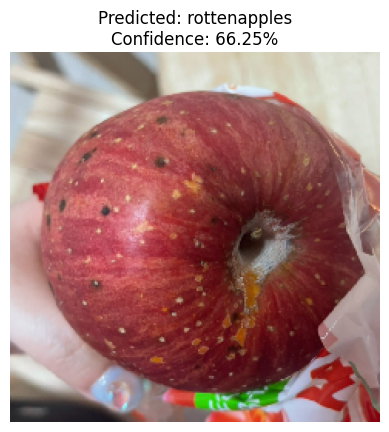

In [109]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'
model = tf.keras.models.load_model(model_path)

# 경로에서 이미지 하나를 선택하여 예측하는 함수
def custom_image_prediction(image_path, model, rev_dict, size=(240, 240)):
    # 이미지 불러오기
    img = image.load_img(image_path, target_size=size)  # 크기에 맞게 이미지 로드
    img_array = image.img_to_array(img) / 255.0  # 이미지를 numpy array로 변환 후 정규화

    # 예측
    predicted_probs = model.predict(np.expand_dims(img_array, axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (이미지 경로를 지정)
image_path = "/content/drive/MyDrive/rotten_apple4.png"  # 사용자가 이미지 경로를 직접 지정
custom_image_prediction(image_path, model, rev_dict, size=(240, 240))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Predicted Class: rottenapples, Confidence: 52.31%


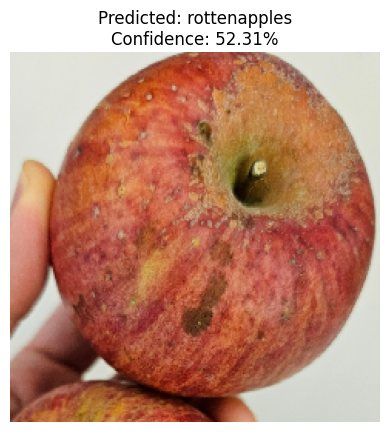

In [128]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'
model = tf.keras.models.load_model(model_path)

# 경로에서 이미지 하나를 선택하여 예측하는 함수
def custom_image_prediction(image_path, model, rev_dict, size=(240, 240)):
    # 이미지 불러오기
    img = image.load_img(image_path, target_size=size)  # 크기에 맞게 이미지 로드
    img_array = image.img_to_array(img) / 255.0  # 이미지를 numpy array로 변환 후 정규화

    # 예측
    predicted_probs = model.predict(np.expand_dims(img_array, axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (이미지 경로를 지정)
image_path = "/content/drive/MyDrive/rotten_apple9.png"  # 사용자가 이미지 경로를 직접 지정
custom_image_prediction(image_path, model, rev_dict, size=(240, 240))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted Class: rottenapples, Confidence: 73.44%


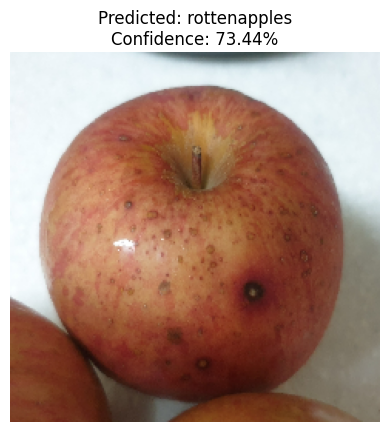

In [121]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 모델 로드
model_path = '/content/drive/MyDrive/saved_model/fruit_classifier3.h5'
model = tf.keras.models.load_model(model_path)

# 경로에서 이미지 하나를 선택하여 예측하는 함수
def custom_image_prediction(image_path, model, rev_dict, size=(240, 240)):
    # 이미지 불러오기
    img = image.load_img(image_path, target_size=size)  # 크기에 맞게 이미지 로드
    img_array = image.img_to_array(img) / 255.0  # 이미지를 numpy array로 변환 후 정규화

    # 예측
    predicted_probs = model.predict(np.expand_dims(img_array, axis=0))  # 예측
    predicted_class_index = np.argmax(predicted_probs)  # 예측된 클래스
    predicted_label = rev_dict[predicted_class_index]  # 예측된 클래스 이름
    confidence = predicted_probs[0][predicted_class_index] * 100  # 예측 확률

    # 결과 출력
    print(f"Predicted Class: {predicted_label}, Confidence: {confidence:.2f}%")

    # 이미지 시각화
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

# 예시 실행 (이미지 경로를 지정)
image_path = "/content/drive/MyDrive/rotten_apple7.png"  # 사용자가 이미지 경로를 직접 지정
custom_image_prediction(image_path, model, rev_dict, size=(240, 240))


In [19]:
#!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 22.9 MB/s eta 0:00:00
